# Tutorial on CountVectorizer (BOW) and TfidfVectorizer (TF-IDF)
Reference: https://www.kaggle.com/adamschroeder/countvectorizer-tfidfvectorizer-predict-comments/data
        
Dataset: https://www.kaggle.com/c/jigsaw-toxic-comment-classification-challenge/data


In [54]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.feature_extraction.text import CountVectorizer

from collections import Counter

import matplotlib.pyplot as ply
%matplotlib inline

import seaborn as sns

# Gentile Look at CountVectorizer 

In [2]:
txt = ["He is ::having a great Time, at the park time?",
       "She, unlike most women, is a big player on the park's grass.",
       "she can't be going"]

In [3]:
count_vec = CountVectorizer(stop_words='english',
                           analyzer='word',
                           ngram_range=(1, 1),
                           max_df=1.0,
                           min_df=1,
                           max_features=None)

# count_vec = sklearn.feature_extraction.text.CountVectorizer()

count_train = count_vec.fit(txt)
bag_of_words = count_vec.transform(txt)



In [4]:
type(count_train.vocabulary)

NoneType

In [5]:
print(count_vec.get_feature_names())

['big', 'going', 'grass', 'great', 'having', 'park', 'player', 'time', 'unlike', 'women']


In [6]:
print(count_train.vocabulary_)

{'having': 4, 'great': 3, 'time': 7, 'park': 5, 'unlike': 8, 'women': 9, 'big': 0, 'player': 6, 'grass': 2, 'going': 1}


### Change N-grams to 2
Similar to gensim.models.phrases.Phrase()

In [7]:
count_vec = sklearn.feature_extraction.text.CountVectorizer(stop_words='english',
                                                           analyzer='word',
                                                           ngram_range=(1, 2),
                                                           max_df=1.0,
                                                           min_df=1,
                                                           max_features=None)

count_train = count_vec.fit(txt)
bag_of_words = count_vec.transform(txt)
print(count_vec.get_feature_names())

['big', 'big player', 'going', 'grass', 'great', 'great time', 'having', 'having great', 'park', 'park grass', 'park time', 'player', 'player park', 'time', 'time park', 'unlike', 'unlike women', 'women', 'women big']


In [8]:
len(count_vec.vocabulary_)

19

In [9]:
bag_of_words.toarray()

array([[0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 2, 1, 0, 0, 0, 0],
       [1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [10]:
bag_of_words.shape

(3, 19)

### Change N-Gram to 3

In [11]:
count_vec = sklearn.feature_extraction.text.CountVectorizer(stop_words='english',
                                                           analyzer='word',
                                                           ngram_range=(1, 3),
                                                           max_df=1.0,
                                                           min_df=1,
                                                           max_features=None)

count_train = count_vec.fit(txt)
bag_of_words = count_vec.transform(txt)

print(count_vec.get_feature_names())

['big', 'big player', 'big player park', 'going', 'grass', 'great', 'great time', 'great time park', 'having', 'having great', 'having great time', 'park', 'park grass', 'park time', 'player', 'player park', 'player park grass', 'time', 'time park', 'time park time', 'unlike', 'unlike women', 'unlike women big', 'women', 'women big', 'women big player']


In [12]:
len(count_vec.vocabulary_)

26

### Change ```min_df``` (Remove Rare Words)
min_df=0.66 requires that a term appear in 66% of the docuemnts for it to be considered part of the vocabulary



Sometimes min_df is used to limit the vocabulary size, so it learns only those terms that appear in at least 10%, 20%, etc. of the documents.


In [14]:
count_vec = sklearn.feature_extraction.text.CountVectorizer(stop_words='english',
                                                       analyzer='word',
                                                       ngram_range=(1,1),
                                                       max_df=1.0,
                                                       min_df=0.6,
                                                       max_features=None)

count_train = count_vec.fit(txt)
bag_of_words = count_vec.transform(txt)
print(count_vec.get_feature_names())

['park']


### Tune ```max_df```  (Remove Common Words)
When building the vocabulary, it ignores terms that have a document frequency strictly higher than the given threshold.

In [16]:
count_vec = sklearn.feature_extraction.text.CountVectorizer(stop_words='english',
                                                           analyzer='word',
                                                           ngram_range=(1, 1),
                                                           max_df=0.5,
                                                           min_df=1,
                                                           max_features=None)

count_train = count_vec.fit(txt)

bag_of_words = count_vec.transform(txt)

print(count_vec.get_feature_names())

['big', 'going', 'grass', 'great', 'having', 'player', 'time', 'unlike', 'women']


### Tune ```max_features```
Limit the amount of features (vocabulary) that the vectorizer will learn

In [17]:
count_vec = sklearn.feature_extraction.text.CountVectorizer(stop_words='english',
                                                           analyzer='word',
                                                           ngram_range=(1, 1),
                                                           max_df=1.0,
                                                           min_df=1,
                                                           max_features=4)

count_train = count_vec.fit(txt)
bag_of_words = count_vec.transform(txt)

print(count_vec.get_feature_names())

['big', 'going', 'park', 'time']


In [19]:
bag_of_words.shape

(3, 4)

In [20]:
bag_of_words.toarray()

array([[0, 0, 1, 2],
       [1, 0, 1, 0],
       [0, 1, 0, 0]])

# Gentile Look at ```TfidfVectorizer```

In [21]:
txt1 = ['His smile was not perfect', 'His smile was not not not not perfect', 'she not sang']

In [22]:
tf = sklearn.feature_extraction.text.TfidfVectorizer(smooth_idf=False,
                                                    sublinear_tf=False,
                                                    norm=None,
                                                    analyzer='word')


txt_fitted = tf.fit(txt1)

txt_transformed = tf.transform(txt1)

In [23]:
tf.vocabulary_

{'his': 0, 'smile': 5, 'was': 6, 'not': 1, 'perfect': 2, 'she': 4, 'sang': 3}

In [24]:
idf = tf.idf_

In [25]:
txt_fitted.get_feature_names()

['his', 'not', 'perfect', 'sang', 'she', 'smile', 'was']

In [26]:
idf

array([1.40546511, 1.        , 1.40546511, 2.09861229, 2.09861229,
       1.40546511, 1.40546511])

In [29]:
len(txt_fitted.get_feature_names())

7

In [27]:
len(idf)

7

In [30]:
dict(zip(txt_fitted.get_feature_names(), idf))

{'his': 1.4054651081081644,
 'not': 1.0,
 'perfect': 1.4054651081081644,
 'sang': 2.09861228866811,
 'she': 2.09861228866811,
 'smile': 1.4054651081081644,
 'was': 1.4054651081081644}

We see that the tokens __'sang'__,'she' have the most ```idf``` weight because they are the only tokens that appear in one document only.

The token __'not'__ appears 6 times but it is also in all documents, so its idf is the lowest

### Plot IDF (Inverse Document Frequency)

In [37]:
token_weight = pd.DataFrame(idf, columns=['idf'], index=txt_fitted.get_feature_names())
token_weight

,idf
his,1.405465
not,1.000000
perfect,1.405465
sang,2.098612
she,2.098612
smile,1.405465
was,1.405465


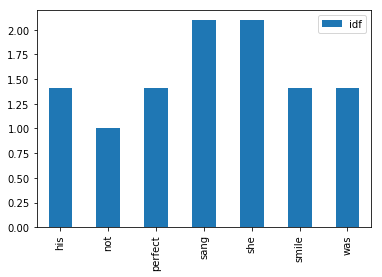

In [39]:
token_weight.plot.bar()

### Sort IDF

In [43]:
index_sorted = np.argsort(idf)

In [45]:
list(map(lambda index: txt_fitted.get_feature_names()[index], index_sorted))

['not', 'his', 'perfect', 'smile', 'was', 'sang', 'she']

#### ```not``` has lowest IDF and ```she``` has highest IDF score

# Read Dataset

In [46]:
train = pd.read_csv('./datasets/step_0/toxic_comment_classification/train.csv')

In [47]:
train.shape

(159571, 8)

In [48]:
train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [49]:
train.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


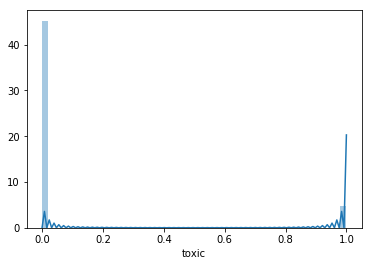

In [50]:
sns.distplot(train['toxic'])

In [55]:
count = Counter(train['toxic'])
count.most_common(10)

[(0, 144277), (1, 15294)]

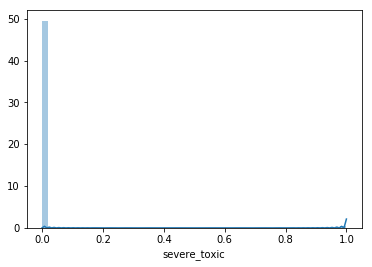

In [51]:
sns.distplot(train['severe_toxic'])

In [56]:
count = Counter(train['severe_toxic'])
count.most_common(10)

[(0, 157976), (1, 1595)]

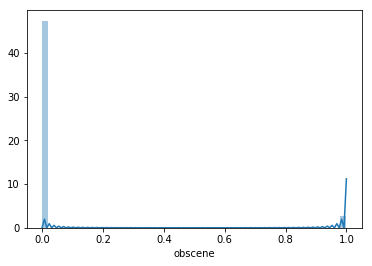

In [52]:
sns.distplot(train['obscene'])

In [57]:
count = Counter(train['obscene'])
count.most_common(10)

[(0, 151122), (1, 8449)]